# Problem Statement Definition

In the rapidly evolving last-mile delivery ecosystem of an e-commerce marketplace, the goal is to optimize delivery speed and cost by intelligently batching orders for delivery by the same rider under a set of rules. The task is to design an algorithm that determines the optimal way to batch orders according to the specified rules, ensuring that the total delivery time and cost are minimized. This problem is simplied to be solved geometrically in a cartesian co-ordinate system where lat and long mark x,y on a 2D cartesian plane.

### Incorporating All Rules
1. **Same Kitchen, Same Customer**: Batch orders from the same kitchen to the same customer if they are ready at the same time (within a 10-minute window) to the same rider.
2. **Different Kitchens, Same Customer**: If orders for the same customer come from two kitchens 1 km apart and are ready at the same time (within a 10-minute window), assign them to the same rider.
3. **Same Kitchen, Different Customers**: Orders from the same kitchen to two different customers (1 km apart) ready at the same time (within a 10-minute window) should be batched to the same rider.
4. **Orders En Route**: For two orders going to the same customer, where the second kitchen's pick-up is on the way to the customer and ready by the time the rider reaches it (considering a 10-minute preparation window), assign both to the same rider.
5. **Intersecting Delivery Paths**: For two orders where the second customer's drop-off is en route to the first customer's location, and the second kitchen's pick-up is also on the way, batch them if both are ready at the same time (or within a 10-minute window by the time the rider reaches the kitchen).

### Input:

1. `num_orders`: The number of orders.
2. `num_drivers`: The number of available drivers for delivery.
3. `Kitchens`: A dictionary of kitchens where key is kitchen id and value is (lat, long) tuple
4. `Drivers`: A dictionary of drivers where key is driver id and value is current (lat, long) tuple
5. `Customers`: A dictionary of customers where key is customer id and value is customer delviery location (lat, long) tuple
6. `orders`: A dictionary of orders, where the key is the order ID, and the value is a list with `[Kitchen ID, Customer ID, readyTime in minutes]`.
3. `distances`: A matrix representing the distances between any two points in the delivery network (including kitchens and customers).
4. `drivers`: The number of available drivers for delivery.
5. 'driverLocations' : Array of (Lat,Long) tuples for all drivers

For ease of computation, assume all drivers travel at same speed and treat lat long as cartesian co-ordinates, and solve geometrically where two lat long points can be connected by straight line for min distance between them, ignore routes and obstacles.

### Output:

- Return a tuple consisting of two elements:
    1. The minimum total delivery time required to deliver all orders following the batching rules.
    2. A dictionary with driver IDs as keys and the list of order IDs they are responsible for delivering as values.




# Coding

In [2]:
import matplotlib.pyplot as plt
import random

def visualize_delivery_process(Kitchens, Customers, Drivers, driver_assigned_orders, orders):
    """
    This function generates visualizations of the delivery process, depicting the movement of drivers, locations of kitchens and customers, and the progression of delivery steps.

    ### Inputs:
    - `Kitchens`: A dictionary mapping kitchen IDs to their respective locations.
    - `Customers`: A dictionary mapping customer IDs to their respective delivery locations.
    - `Drivers`: A dictionary containing driver IDs and their current locations.
    - `driver_assigned_orders`: A dictionary mapping driver IDs to the list of order IDs they are responsible for delivering.
    - `orders`: A dictionary containing order details including kitchen ID, customer ID, and readiness time.

    ### Outputs:
    - Visualizations showing the delivery process at each step.

    ### Detailed Description:
    - **Initialization**:
        - Generates a color map based on the number of drivers to distinguish between them in the visualizations.
        - Initializes an empty list to track legend labels already added.

    - **Visualization Loop**:
        - Iterates over each step in the delivery process.
        - Creates a new figure for each step.

    - **Plotting Kitchens**:
        - Iterates over the kitchens and plots them as green triangles on the graph.
        - Adds a legend label for kitchens if not already added.

    - **Plotting Customers**:
        - Iterates over the customers and plots them as orange dots on the graph.
        - Adds a legend label for customers if not already added.

    - **Plotting Drivers**:
        - Iterates over the assigned orders for each driver.
        - Checks if the current step is within the range of orders assigned to the driver.
        - Retrieves the order ID for the current step and extracts the customer location.
        - Plots the driver's location as a colored star marker at the customer location.
        - Adds a legend label for each driver if not already added.

    - **Customization**:
        - Sets the title of the plot to indicate the current delivery step.
        - Adds labels for the x and y axes.
        - Adds a legend to differentiate between elements on the plot.
        - Enables grid lines for better visualization.
        - Adjusts the limits of the plot to ensure all elements are visible.

    - **Display**:
        - Displays the plot for the current delivery step.

    ### Example Usage:
    visualize_delivery_process(Kitchens, Customers, Drivers, driver_assigned_orders, orders)

    """
    
    colors = plt.cm.get_cmap('hsv', len(Drivers) + 1)  # +1 to ensure a wide range of colors
    legend_labels = []  # To track labels already added to the legend

    num_steps = max(len(driver_orders) for driver_orders in driver_assigned_orders.values())

    for step in range(num_steps):
        plt.figure(figsize=(10, 8))

        # Plot Kitchens
        for k_id, (x, y) in Kitchens.items():
            label = 'Kitchen' if 'Kitchen' not in legend_labels else ""
            plt.scatter(x, y, color='green',marker='^', s=100, label=label, zorder=5)
            if label: legend_labels.append(label)
        
        # Plot Customers
        for c_id, (x, y) in Customers.items():
            label = 'Customer' if 'Customer' not in legend_labels else ""
            plt.scatter(x, y, color='orange', marker='.', s=75, label=label, zorder=4)
            if label: legend_labels.append(label)

        # Plot Drivers
        for idx, (driver, order_ids) in enumerate(driver_assigned_orders.items()):
            if step < len(order_ids):
                order_id = order_ids[step]
                kitchen_id, customer_id, _ = orders[order_id]
                customer_location = Customers[customer_id]

                label = f"Driver {driver}" if f"Driver {driver}" not in legend_labels else ""
                plt.scatter(customer_location[0], customer_location[1],marker="*", color=colors(idx), s=45, label=label, zorder=6)
                if label: legend_labels.append(label)

        plt.title(f"Delivery Step {step + 1}")
        plt.xlabel("X Coordinate")
        plt.ylabel("Y Coordinate")
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.xlim(-25, 80)  # Adjust bounds as needed
        plt.ylim(-25, 80)
        plt.show()

# Example usage with predefined Kitchens, Customers, Drivers, driver_assigned_orders, and orders
# visualize_delivery_process(Kitchens, Customers, Drivers, driver_assigned_orders, orders)


C0 (10, 37)
C1 (19, 16)
C2 (49, 2)
C3 (50, 38)
C4 (41, 28)
C5 (8, 16)
C6 (23, 36)
C7 (22, 32)
C8 (7, 30)
C9 (49, 50)
C10 (37, 12)
C11 (41, 3)
C12 (20, 27)
C13 (39, 3)
C14 (8, 46)
C15 (45, 50)
C16 (38, 14)
C17 (31, 37)
C18 (32, 18)
C19 (35, 46)


K1 (0, 0)
K2 (50, 50)


O0 : ['K2', 'C14', 1]
O1 : ['K1', 'C19', 9]
O2 : ['K2', 'C18', 10]
O3 : ['K1', 'C3', 3]
O4 : ['K1', 'C5', 5]
O5 : ['K1', 'C16', 6]
O6 : ['K2', 'C12', 0]
O7 : ['K1', 'C7', 9]
O8 : ['K2', 'C6', 9]
O9 : ['K1', 'C8', 7]
O10 : ['K1', 'C8', 8]
O11 : ['K1', 'C0', 6]
O12 : ['K2', 'C9', 8]
O13 : ['K2', 'C4', 7]
O14 : ['K2', 'C2', 10]
O15 : ['K2', 'C4', 4]
O16 : ['K1', 'C2', 3]
O17 : ['K1', 'C8', 10]
O18 : ['K2', 'C19', 3]
O19 : ['K2', 'C3', 9]
O20 : ['K1', 'C1', 10]
O21 : ['K2', 'C0', 1]
O22 : ['K2', 'C15', 0]
O23 : ['K2', 'C5', 10]
O24 : ['K2', 'C6', 0]



Overall Completion Time: 418.5246293316233
D1: ['O6', 'O3', 'O18', 'O15', 'O13', 'O12', 'O8', 'O14']
D2: ['O22', 'O24', 'O0']
D3: ['O21']
D4: ['O16']
D5: ['O4', 'O5']
D6: ['O1

/var/folders/2p/d_5l4xlj7ygbv8ldw505sjnr0000gn/T/ipykernel_10972/3262784333.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', len(Drivers) + 1)  # +1 to ensure a wide range of colors


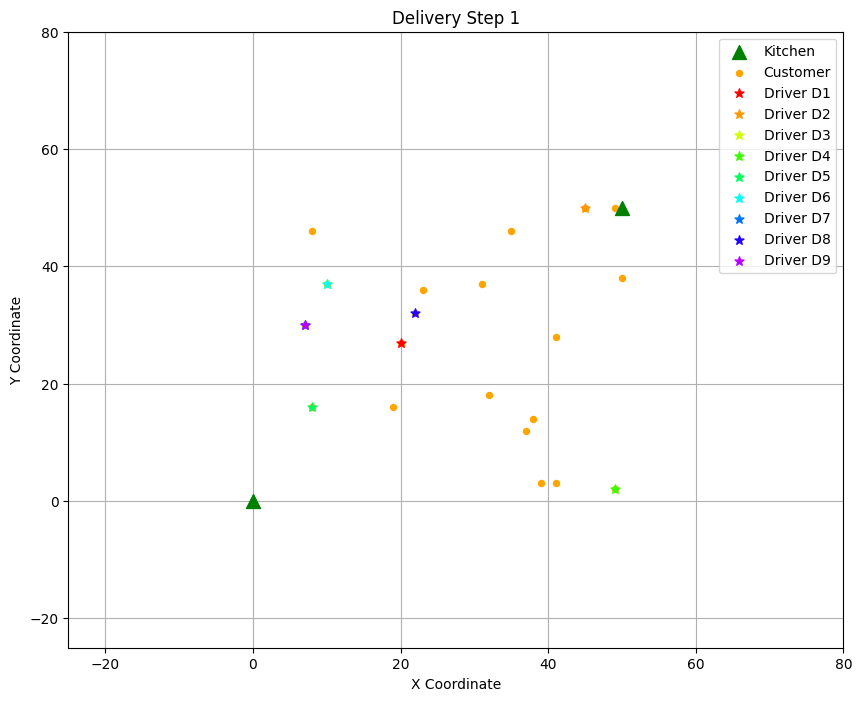

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


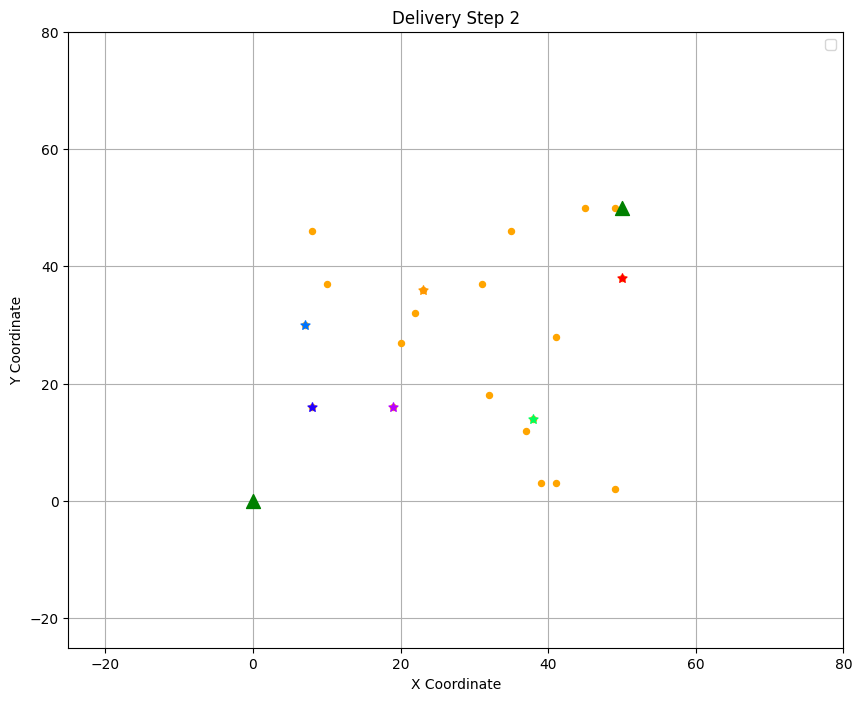

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


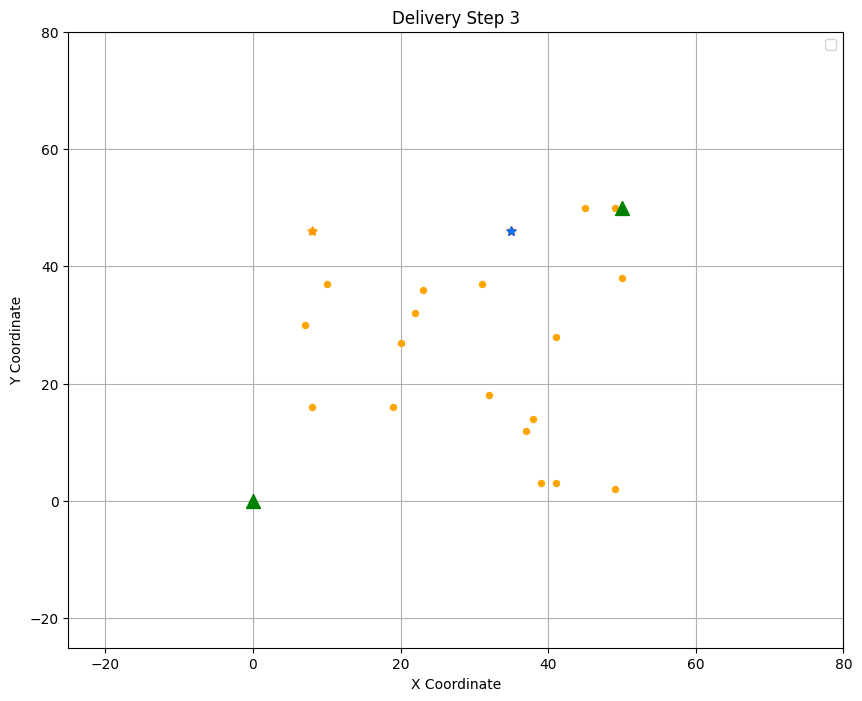

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


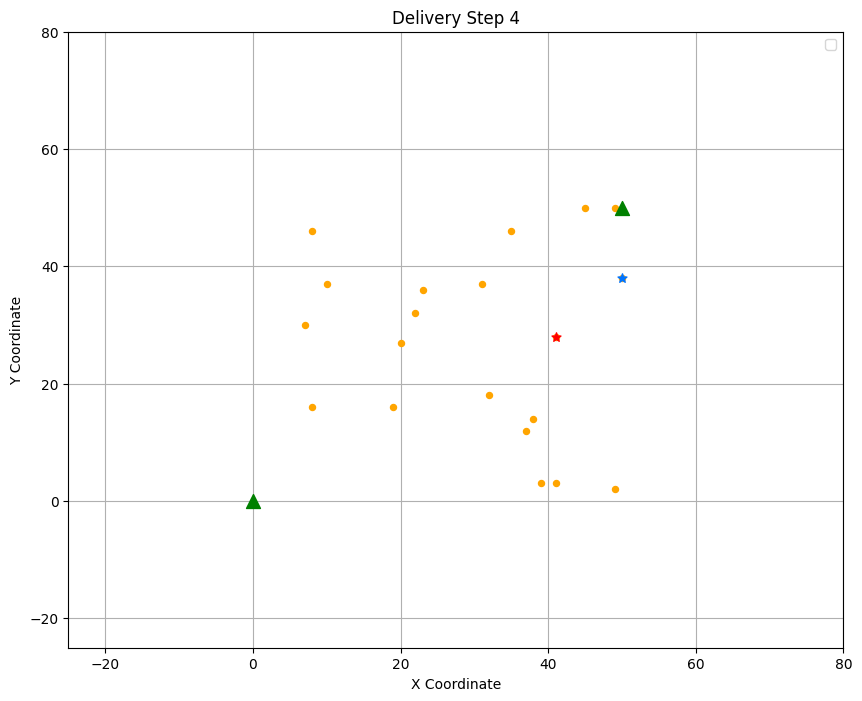

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


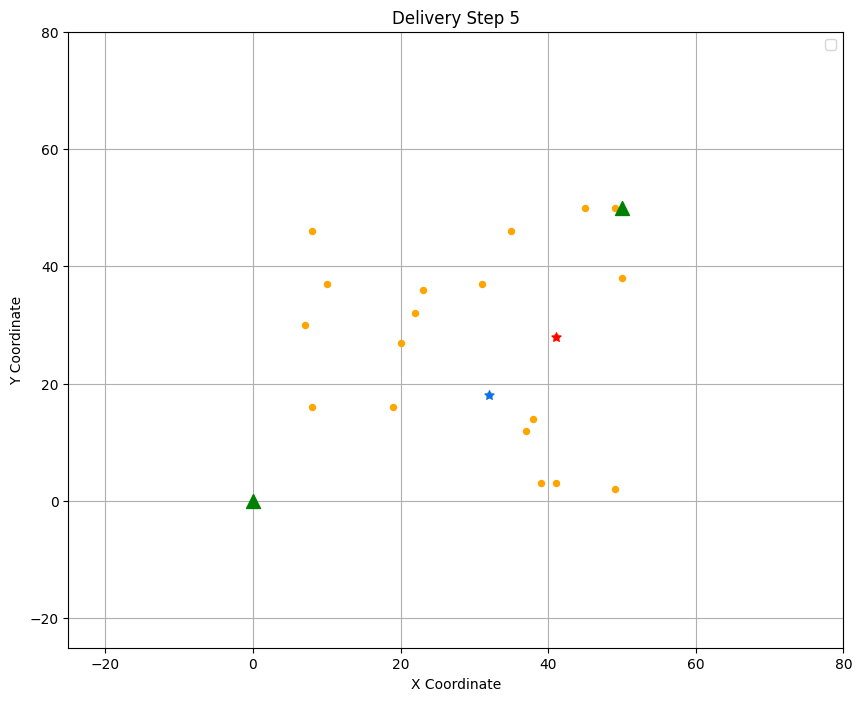

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


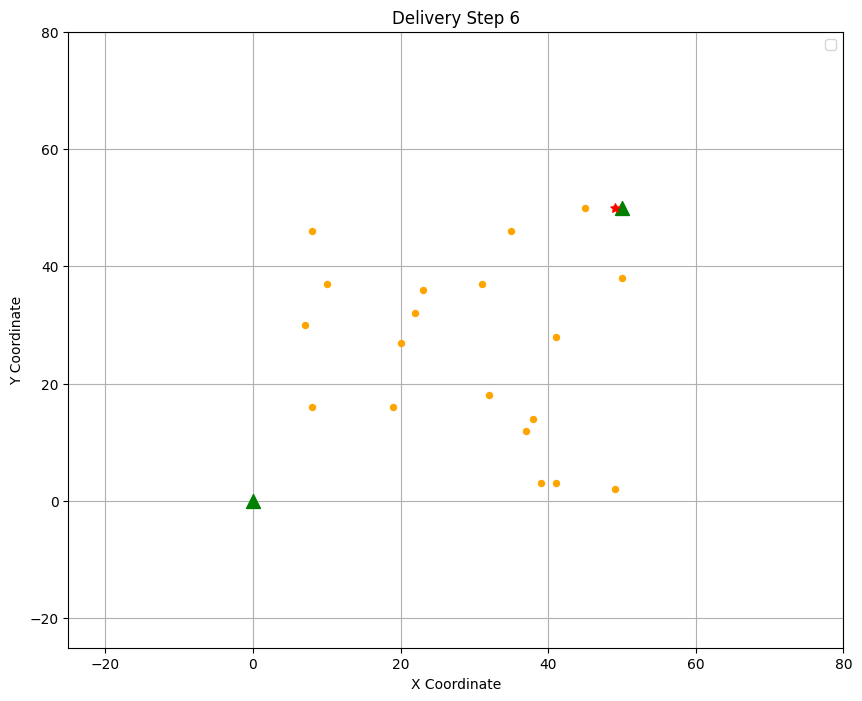

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


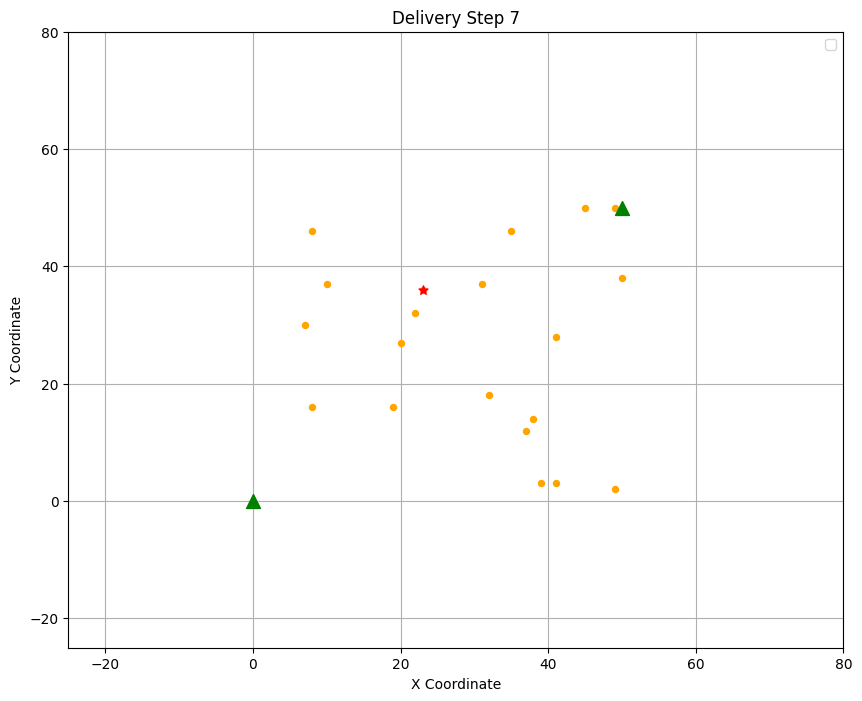

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


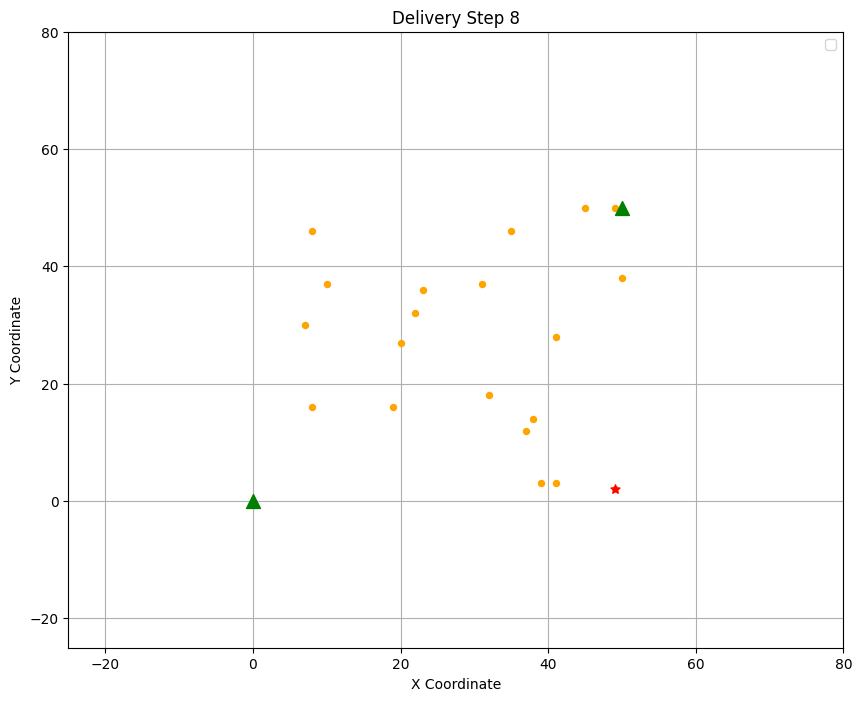

In [12]:
import random
from math import sqrt

def calculate_distance(point1, point2):
    """Calculate Euclidean distance between two points."""
    return sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def simulate_delivery(orders, Kitchens, Customers, Drivers, driver_start_point):
    # Sort orders by readiness time
    sorted_orders = sorted(orders.items(), key=lambda x: x[1][2])
    driver_locations = {driver: driver_start_point for driver in Drivers}
    driver_assigned_orders = {driver: [] for driver in Drivers}
    time_elapsed = {driver: 0 for driver in Drivers}

    # Assume all drivers start immediately for simplicity
    for order_id, (kitchen_id, customer_id, ready_time) in sorted_orders:
        assigned_driver = None
        min_extra_time = float('inf')

        for driver, orders in driver_assigned_orders.items():
            current_location = driver_locations[driver] if orders else driver_start_point
            kitchen_location = Kitchens[kitchen_id]
            customer_location = Customers[customer_id]

            # Calculate travel and waiting times
            travel_time_to_kitchen = calculate_distance(current_location, kitchen_location)
            travel_time_to_customer = calculate_distance(kitchen_location, customer_location)
            total_time = travel_time_to_kitchen + travel_time_to_customer

            # Check if the driver can wait for the order if it's not ready
            wait_time = max(0, ready_time - (time_elapsed[driver] + travel_time_to_kitchen))
            extra_time = total_time + wait_time

            # Assign order to the driver with the minimum extra time required
            if extra_time < min_extra_time:
                min_extra_time = extra_time
                assigned_driver = driver

        # Update assigned driver's information
        if assigned_driver:
            driver_assigned_orders[assigned_driver].append(order_id)
            time_elapsed[assigned_driver] += min_extra_time
            last_order_location = Customers[customer_id]
            driver_locations[assigned_driver] = last_order_location

    # The overall completion time is the max of time_elapsed values
    overall_completion_time = max(time_elapsed.values())
    return overall_completion_time, driver_assigned_orders

def main():
    # Simplified example inputs
    Kitchens = {"K1": (0, 0), "K2": (50, 50)}
    Customers = {f"C{i}": (random.randint(0, 50), random.randint(0, 50)) for i in range(20)}
    orders = {f"O{i}": [f"K{random.randint(1,len(Kitchens))}", random.choice(list(Customers.keys())), random.randint(0,10)] for i in range(25)}
    Drivers = {f"D{i}": (25, 25) for i in range(1,11)}  # 10 drivers starting from the center
    driver_start_point = (25, 25)  # Center point

    overall_completion_time, driver_assigned_orders = simulate_delivery(orders, Kitchens, Customers, Drivers, driver_start_point)
    
    for i in Customers:
        print(i,Customers[i])
    print("\n")

    for i in Kitchens:
        print(i,Kitchens[i])
    print("\n")

    for i in orders:
        print(i,":",orders[i])
    print("\n\n")
    print(f"Overall Completion Time: {overall_completion_time}")
    for driver, _ in driver_assigned_orders.items():
        print(f"{driver}: {_}")
    
    visualize_delivery_process(Kitchens, Customers, Drivers, driver_assigned_orders, orders)
if __name__ == "__main__":
    main()


The provided Python solution aims to optimize the last-mile delivery process in an e-commerce marketplace by efficiently assigning orders to delivery drivers while minimizing the overall completion time. 
### 1. Helper Functions:
- **`calculate_distance(point1, point2)`**: Calculates the Euclidean distance between two points in a 2D Cartesian plane using the distance formula.
- **`find_nearest_order(driver_location, available_orders, Kitchens, Customers)`**: Finds the nearest order to a given driver location based on the kitchen's location. It iterates through available orders and computes the distance between the driver's location and the kitchen associated with each order.

### 2. Main Simulation Function: `simulate_delivery`
- **Inputs**:
    - `orders`: A dictionary containing order details including kitchen ID, customer ID, and readiness time.
    - `Kitchens`: A dictionary mapping kitchen IDs to their respective locations.
    - `Customers`: A dictionary mapping customer IDs to their respective delivery locations.
    - `Drivers`: A dictionary containing driver IDs and their initial locations.
    - `driver_start_point`: Initial starting point for drivers.

- **Logic**:
    1. Sort orders by readiness time to process them in chronological order.
    2. Initialize dictionaries to track driver locations, assigned orders, and time elapsed for each driver.
    3. Iterate through sorted orders:
        - For each order, find the nearest available driver based on current locations and assign the order to that driver.
        - Calculate travel and waiting times for the assigned driver.
        - Update driver's information including assigned orders, elapsed time, and location.
    4. Compute the overall completion time as the maximum time elapsed among all drivers.

- **Outputs**:
    - Returns the overall completion time and a dictionary mapping driver IDs to the list of order IDs they are responsible for delivering.

### 3. Main Execution Block: `main`
- Initializes simplified example inputs including kitchens, customers, orders, drivers, and the initial driver start point.
- Calls the `simulate_delivery` function to obtain the optimized delivery assignment.
- Prints the overall completion time and the list of orders assigned to each driver.
- Optionally, visualizes the delivery process using a visualization function (`visualize_delivery_process`).

### Conclusion:
The solution effectively optimizes the last-mile delivery process by intelligently assigning orders to drivers based on their locations and readiness times. It utilizes basic geometric calculations and iteration to achieve the desired optimization outcome, ensuring efficient and timely delivery of orders in the e-commerce marketplace.